<a href="https://colab.research.google.com/github/CyberSaiyam/ML-Lab-assesment/blob/main/ML_Lab_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description: Implementation of K-means clustering on Red Wine Quality dataset (from Kaggle)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

np.random.seed(5)

In [ ]:
data = pd.read_csv("/content/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Standardizing the data before proceeding:
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [ ]:
from sklearn.cluster import KMeans

km = KMeans(init="random", n_clusters=5)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [ ]:
km.labels_

array([1, 1, 1, ..., 3, 1, 3], dtype=int32)

In [ ]:
km.cluster_centers_

array([[-0.06785136,  0.05867233,  0.10464319,  0.49442581,  0.01951249,
         1.1071543 ,  1.37251739,  0.40018361, -0.15832941, -0.1744676 ,
        -0.60605369, -0.45623994],
       [-0.46953361,  0.67711014, -0.77970326, -0.22818088, -0.07035602,
        -0.40932385, -0.36404   , -0.06966511,  0.3820204 , -0.42288696,
        -0.46220903, -0.48043186],
       [ 0.06532185,  0.0103135 ,  1.10416018, -0.4082848 ,  5.52313653,
        -0.08685714,  0.50070009,  0.18055137, -1.67454694,  3.62449166,
        -0.88828122, -0.37493231],
       [-0.63228203, -0.4182295 , -0.15921222, -0.23964468, -0.37660496,
         0.17129906, -0.21420876, -1.14088709,  0.57782799,  0.17720227,
         1.19791839,  0.80059075],
       [ 1.36248392, -0.68202165,  1.14210247,  0.15880485, -0.01587859,
        -0.53552482, -0.52839004,  0.80645338, -0.84051986,  0.32713598,
         0.18823707,  0.41300007]])

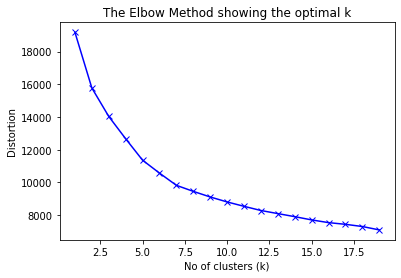

In [ ]:
# k-means determine k
distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

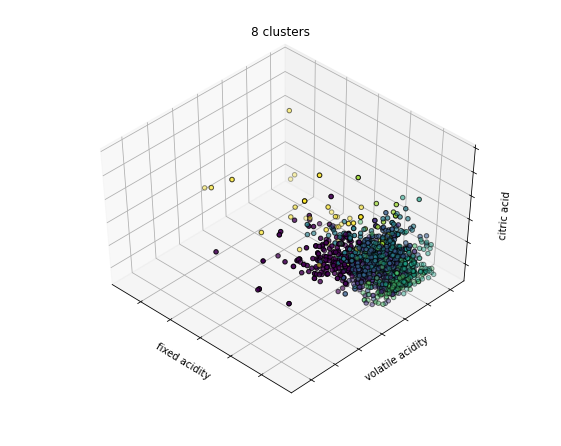

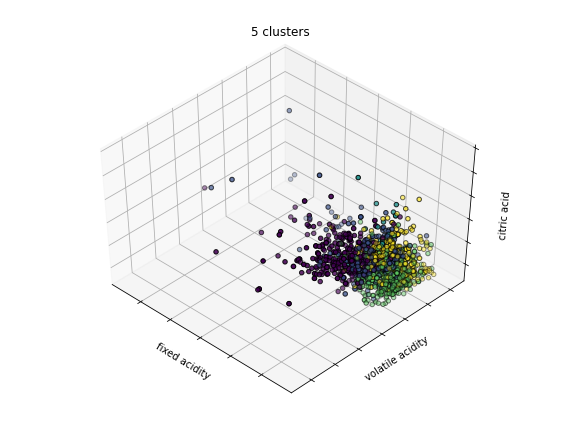

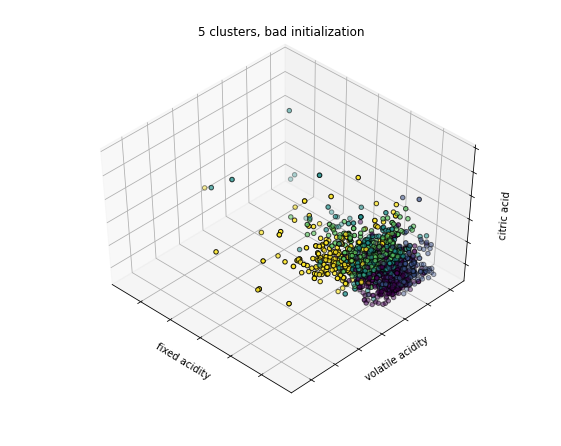

In [ ]:
estimators = [('k_means_8', KMeans(n_clusters=8, init='k-means++')),
              ('k_means_5', KMeans(n_clusters=5, init='k-means++')),
              ('k_means_bad_init', KMeans(n_clusters=5, n_init=1, init='random'))]

fignum = 1
titles = ['8 clusters', '5 clusters', '5 clusters, bad initialization']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(data)
    labels = est.labels_

    ax.scatter(data.values[:, 3], data.values[:, 0], data.values[:, 2], c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('fixed acidity')
    ax.set_ylabel('volatile acidity')
    ax.set_zlabel('citric acid')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1


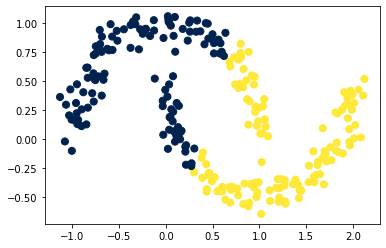

In [ ]:
from sklearn.datasets import make_moons
X3, y3 = make_moons(250, noise=.075, random_state=22)

labels = KMeans(2, random_state=0).fit_predict(X3)
plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=50, cmap='cividis')